介绍了numpy中的数组操作

In [1]:
import numpy as np

### 1. 修改形状操作

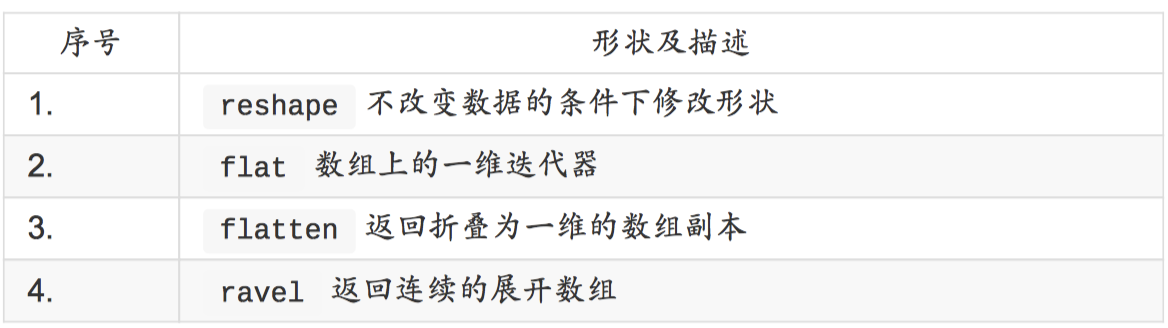

#### 1.1 reshape

In [12]:
# reshape直接修改形状,如果可能，返回的是视图，而非副本
a = np.arange(12).reshape(3,4)

In [10]:
a2 = np.arange(12)
a3 = a2.reshape(3,4)
print(a2)
print(a3)
a3[0,0]=100
print(a2)   # 因为是视图，所以同步修改
print(a3)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[100   1   2   3   4   5   6   7   8   9  10  11]
[[100   1   2   3]
 [  4   5   6   7]
 [  8   9  10  11]]


#### 1.2 flat

In [13]:
# flat一维迭代器
a.flat[5]

5

#### 1.3 flatten

In [9]:
# flatten一维数组，生成副本
b = a.flatten()
print(b)
b[0] = 100
print(b)   # 副本被修改
print(a)   # 原数据不变

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[100   1   2   3   4   5   6   7   8   9  10  11]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


#### 1.4 ravel

In [11]:
# ravel一维数组，优先生成视图，若不行再生成副本
c = np.arange(8).reshape(2,4)
c2 = c.ravel()   # 优先生成视图
# 效果类似于  c2 = c.reshape(-1), 更推荐使用reshape
print(c)
print(c2)
c2[0] =100
print(c)
print(c2)

[[0 1 2 3]
 [4 5 6 7]]
[0 1 2 3 4 5 6 7]
[[100   1   2   3]
 [  4   5   6   7]]
[100   1   2   3   4   5   6   7]


### 2. 翻转操作

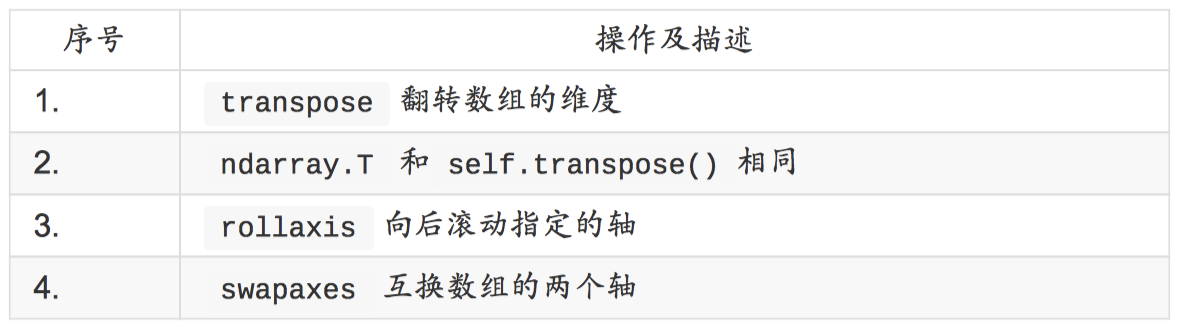

#### 2.1 transpose

尽可能的返回视图

In [18]:
a = np.arange(6).reshape(2,3)
b = a.transpose()
print(a)
print(b)
b[0, 0] = 100
print(b)    
print(a)  # 优先返回视图

[[0 1 2]
 [3 4 5]]
[[0 3]
 [1 4]
 [2 5]]
[[100   3]
 [  1   4]
 [  2   5]]
[[100   1   2]
 [  3   4   5]]


#### 2.2 .T 

行为类似于transpose函数

In [19]:
a = np.arange(6).reshape(2,3)
b = a.T
print(a)
print(b)
b[0, 0] = 100
print(b)    
print(a)  # 优先返回视图

[[0 1 2]
 [3 4 5]]
[[0 3]
 [1 4]
 [2 5]]
[[100   3]
 [  1   4]
 [  2   5]]
[[100   1   2]
 [  3   4   5]]


#### 2.3 rollaxis

In [24]:
# np.rollaxis(arr, axis, first)   
# 将指定的axis向后排到first位置上，其他依次
# roll过程中均为视图
a = np.arange(8).reshape(2,2,2)
print("原数组\n", a)
b = np.rollaxis(a, 2)   # 将axis=2滚动到axis=0
print("2-->0数组\n", b)
c = np.rollaxis(a, 2, 1)    # 将axis=2滚动到axis=1
print("2-->1数组\n", c)

原数组
 [[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]
2-->0数组
 [[[0 2]
  [4 6]]

 [[1 3]
  [5 7]]]
2-->1数组
 [[[0 2]
  [1 3]]

 [[4 6]
  [5 7]]]


#### 2.4 swapaxes

In [27]:
# numpy.swapaxes(arr, axis1, axis2) 交换两轴
# 一般返回视图
a = np.arange(8).reshape(2,2,2)
print("原数组\n", a)
b = np.swapaxes(a, 2, 0)   # 将axis=2滚动到axis=0
print("2<-->0数组\n", b)
c = np.swapaxes(a, 2, 1)    # 将axis=2滚动到axis=1
print("2<-->1数组\n", c)

原数组
 [[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]
2<-->0数组
 [[[0 4]
  [2 6]]

 [[1 5]
  [3 7]]]
2<-->1数组
 [[[0 2]
  [1 3]]

 [[4 6]
  [5 7]]]


### 3. 修改维度

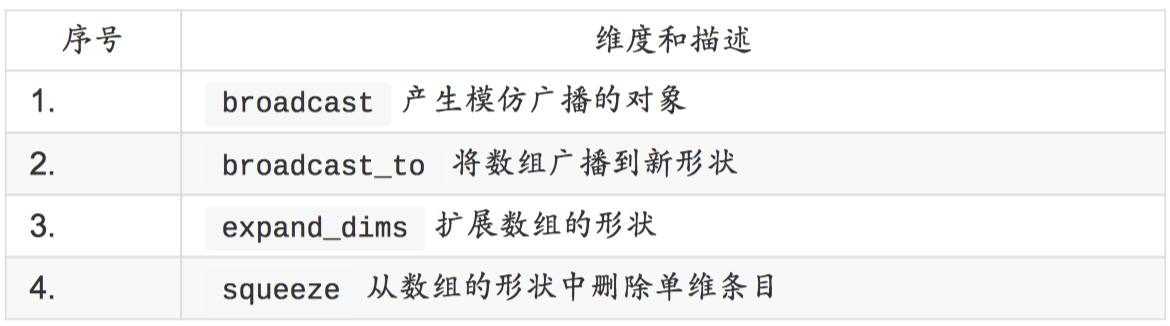

#### 3.1 broadcast_arrays

In [28]:
# broadcast_arrays(arr1, arr2)将对arr1和arr2进行广播操作，返回视图对象
x = np.array([[1,2,3]])
y = np.array([[1],[2],[3]])
np.broadcast_arrays(x, y)

[array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]), array([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])]

In [29]:
# 可以通过简单的列表表达式使其返回副本，而非视图
[np.array(a) for a in np.broadcast_arrays(x, y)]

[array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]), array([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])]

#### 3.2 broadcast_to

In [30]:
# 广播到新形状， 返回一个只读的视图
x = np.array([1,2,3])
np.broadcast_to(x, (3,3))

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

#### 3.3 expand_dims

In [33]:
# numpy.expand_dims(arr, axis)
# 通过在指定位置插入新的轴来扩展数组形状
# 视图操作
x = np.array([[1,2], [3,4]])
print(x)
x2 = np.expand_dims(x, 0)
x2[0,0,0] = 100
print(x2)
print(x)

[[1 2]
 [3 4]]
[[[100   2]
  [  3   4]]]
[[100   2]
 [  3   4]]


#### 3.4 np.newaxis

In [34]:
# 其通过切片的方式进行维度增加，效果类似于expand_dims
x = np.array([[1,2], [3,4]])
x2 = x[:, np.newaxis]    # 等同于np.expand_dims(x, 1)
print(x2)
x3 = x[np.newaxis, :]    # 等同于np.expand_dims(x, 0)
print(x3)

[[[1 2]]

 [[3 4]]]
[[[1 2]
  [3 4]]]


#### 3.5 np.squeeze

In [36]:
# expand_dims的反操作，删除数组形状中的一维条目
# numpy.squeeze(arr, axis)可以指定axis，若不指定，删除所有的一维条目
# 返回的是视图
x = np.arange(8).reshape(1,2,1,2,2)
x

array([[[[[0, 1],
          [2, 3]]],


        [[[4, 5],
          [6, 7]]]]])

In [40]:
# 删除axis=0
y = x.squeeze(0)  
print(y.shape)
y[0,0,0,0] = 100
print(y) 
print(x)     # 镜像操作，删除原数据

(2, 1, 2, 2)
[[[[100   1]
   [  2   3]]]


 [[[  4   5]
   [  6   7]]]]
[[[[[100   1]
    [  2   3]]]


  [[[  4   5]
    [  6   7]]]]]


In [41]:
# 删除所有的axis
z = x.squeeze()
z.shape

(2, 2, 2)

### 4. 数组连接

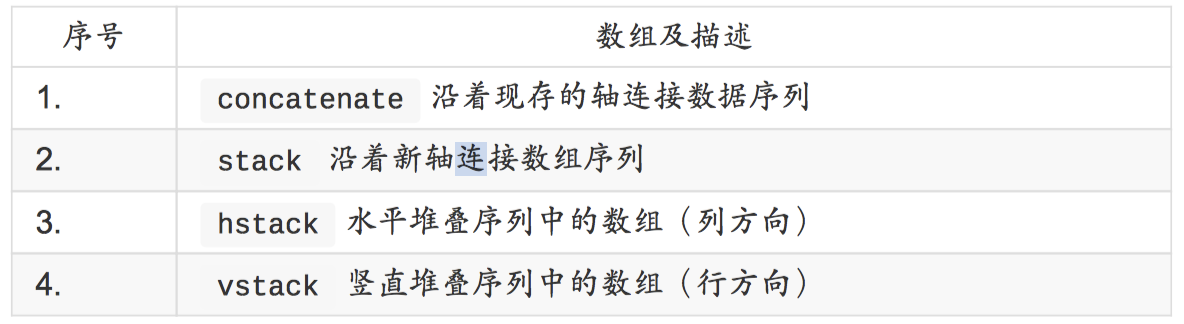

#### 4.1 np.concatenate

此函数用于沿指定轴连接相同形状的两个或多个数组。

In [42]:
# numpy.concatenate((a1, a2, ...), axis), axis默认为0
a = np.array([[1,2], [3,4]])
b = np.array([[5,6], [7,8]])
print("Array a is:")
print(a)
print("Array b is:")
print(b)

Array a is:
[[1 2]
 [3 4]]
Array b is:
[[5 6]
 [7 8]]


In [43]:
# 沿着axis=0进行连接
np.concatenate((a,b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [44]:
# 沿着axis=1进行连接
np.concatenate((a,b), axis=1)

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

#### 4.2 np.stack

与concatenate沿着已有轴连接不同，stack沿新轴连接数组序列

In [45]:
print("Array a is:")
print(a)
print("Array b is:")
print(b)

Array a is:
[[1 2]
 [3 4]]
Array b is:
[[5 6]
 [7 8]]


In [46]:
# 在axis=0上进行stack
c1 = np.stack((a,b),0)
print(c1)
print(c1.shape)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
(2, 2, 2)


In [47]:
# 在axis=1上进行stack
c2 = np.stack((a,b),1)
print(c2)
print(c2.shape)

[[[1 2]
  [5 6]]

 [[3 4]
  [7 8]]]
(2, 2, 2)


#### 4.3 np.hstack

In [48]:
# 水平堆叠数组,等效于沿着axis=1（第二个轴）进行concatenate，除非是1-D array
print("Array a is:")
print(a)
print("Array b is:")
print(b)

Array a is:
[[1 2]
 [3 4]]
Array b is:
[[5 6]
 [7 8]]


In [49]:
np.hstack((a, b))

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

#### 4.4 np.vstack

In [51]:
# 水平堆叠数组,等效于沿着axis=0（第一个轴）进行concatenate，除非是1-D array
np.vstack((a, b))

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

### 5. 数组分割

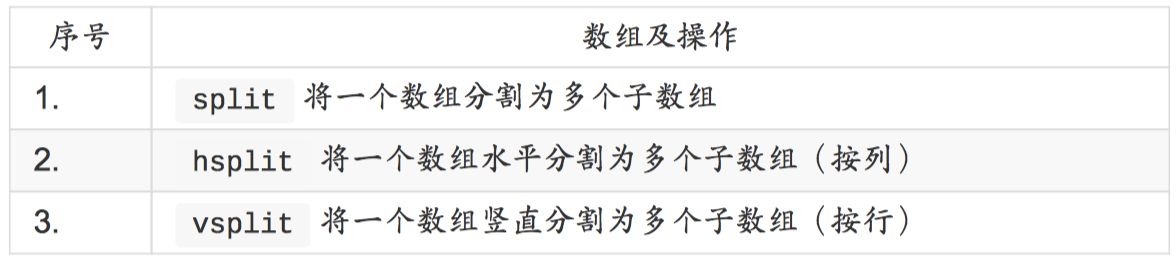

#### 5.1 np.split

该函数沿特定的轴将数组分割为子数组。

In [52]:
# numpy.split(ary, indices_or_sections, axis)
# indices_or_sections ：可以是整数，表明要从输入数组创建的，等大小的 子数组的数量。 如果此参数是一维数组，则其元素表明要创建新子数组的点位。
# axis默认为0
a = np.arange(9)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [53]:
np.split(a, 3)   # 分成三份，份数必须可以被整除

[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8])]

In [55]:
np.split(a, [3,7])    # 在第3和第7个的位置（index之前）进行划分

[array([0, 1, 2]), array([3, 4, 5, 6]), array([7, 8])]

#### 5.2 np.hsplit

numpy.hsplit 是 split() 函数的特例，其中轴为 1 表示水平分割，无论输入数组的维度是什么。

In [56]:
a = np.arange(16).reshape(4,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [59]:
# hsplit是hstack的反操作
np.hsplit(a, 2)

[array([[ 0,  1],
        [ 4,  5],
        [ 8,  9],
        [12, 13]]), array([[ 2,  3],
        [ 6,  7],
        [10, 11],
        [14, 15]])]

#### 5.3 np.vsplit

numpy.vsplit是split() 函数的特例，其中轴为 0 表示竖直分割，无论输入数组的维度是什么。

In [60]:
# vsplit是vsplit的反操作
a = np.arange(16).reshape(4,4)
np.vsplit(a, 2)

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]), array([[ 8,  9, 10, 11],
        [12, 13, 14, 15]])]

### 6. 添加/删除元素

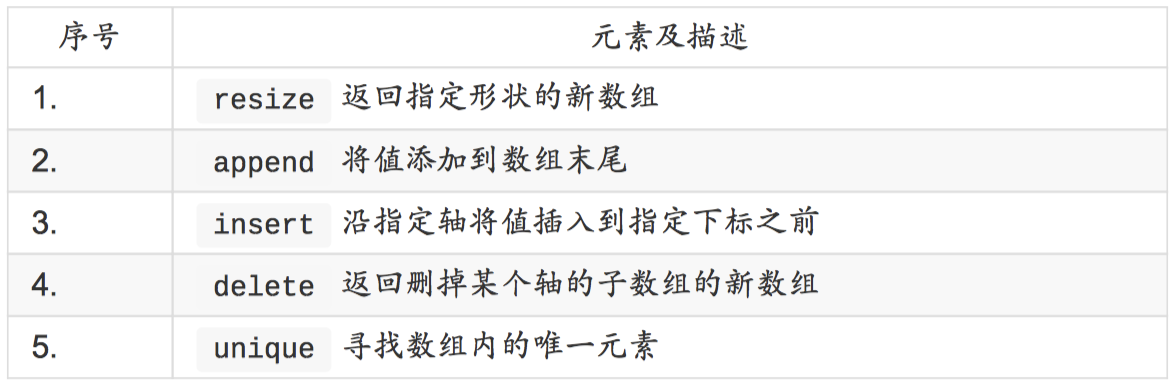

#### 6.1 np.resize

In [63]:
# 返回指定大小的新数组，即副本。如果新大小大于原始大小，则包含原始数组中的元素的重复副本。
a = np.arange(6).reshape(2,3)
print("原始数组:\n{}".format(a))
b = np.resize(a, (3,2))
print("resize同等大小的数组:\n{}".format(b))
c = np.resize(a, (3,3))
print("resize同等大小的数组:\n{}".format(c))

原始数组:
[[0 1 2]
 [3 4 5]]
resize同等大小的数组:
[[0 1]
 [2 3]
 [4 5]]
resize同等大小的数组:
[[0 1 2]
 [3 4 5]
 [0 1 2]]


#### 6.2 np.append

In [64]:
# numpy.append(arr, values, axis)
# 沿着指定轴的末尾追加数值，两者间的shape必须匹配，否则报错
# 若不指定axis，则arr和values均会被ravel（）为一维再进行append
# 返回的是新的副本

In [65]:
a = np.arange(6).reshape(2,3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [66]:
# 不申明axis，则先被ravel，再append
print(np.append(a, [6,7,8]))
print(np.append(a, [[6,7], [8,9], [10, 11]]))

[0 1 2 3 4 5 6 7 8]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [69]:
# 申明axis，必须保证非axis之外，其他axis的shape一样
print(np.append(a, [[6,7,8]], axis=0))
print(np.append(a, [[6,7,8], [9,10,11]], axis=1))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0  1  2  6  7  8]
 [ 3  4  5  9 10 11]]


#### 6.3 np.insert

In [71]:
# numpy.insert(arr, obj, values, axis)
# 其操作类似于append，只是append为末端插入，而insert通过obj参数声明在其前插入值的索引
# 若不声明axis，则先被ravel()，再做插入（按展平后的索引位置进行插入）
# 会触发广播机制
# 非原地操作，即创建副本

In [73]:
a = np.arange(6).reshape(2,3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [74]:
# 不声明axis，展平后插入
np.insert(a, 3, np.array([100, 200]))   # 100插入到3的索引下

array([  0,   1,   2, 100, 200,   3,   4,   5])

In [75]:
# 沿着axis=0进行广播
np.insert(a, 1, 100, axis=0)

array([[  0,   1,   2],
       [100, 100, 100],
       [  3,   4,   5]])

In [76]:
# 沿着axis=1进行广播
np.insert(a, 1, 100, axis=1)

array([[  0, 100,   1,   2],
       [  3, 100,   4,   5]])

#### 6.4 np.delete

In [77]:
# Numpy.delete(arr, obj, axis)
# 其为insert的反操作，obj参数声明在删除的索引
# 若未指定axis，则会先ravel()再按之后的index顺序进行删除
# 非原地操作，即创建副本

In [78]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [79]:
# 未定义axis，单个元素删除
np.delete(a, 4)

array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11])

In [80]:
# 未定义axis，多个元素删除
np.delete(a, [4,5])

array([ 0,  1,  2,  3,  6,  7,  8,  9, 10, 11])

In [82]:
# 未定义axis，多个元素删除
np.delete(a, np.s_[::2])   # 每两个元素进行删除

array([ 1,  3,  5,  7,  9, 11])

In [81]:
# 声明axis
np.delete(a, 1, axis=1)   # 删除编号为1的列

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11]])

#### 6.5 np.unique

In [84]:
# numpy.unique(arr, return_index, return_inverse, return_counts)
# 如果不是1维数组，会展开后再做去重操作
# return_index=True返回unique元素的索引，return_inverse=True返回所有元素的编号（相同元素为一个索引），return_counts=True返回元素个数
# 此函数返回输入数组中的去重元素数组。 该函数能够返回一个元组，包含去重数组 和相关索引的数组。
# 返回为副本

In [85]:
a = np.array([[1,2,3], [2,3,4], [3,4,5]])
a

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [86]:
# 默认只返回去重后的unique元素
np.unique(a)

array([1, 2, 3, 4, 5])

In [87]:
# 返回unique元素的index,保留重复元素中index靠前的这个
np.unique(a, return_index=True)

(array([1, 2, 3, 4, 5]), array([0, 1, 2, 5, 8]))

In [88]:
# 返回去所有元素的编号（相同元素为一个索引）
np.unique(a, return_inverse=True)

(array([1, 2, 3, 4, 5]), array([0, 1, 2, 1, 2, 3, 2, 3, 4]))

In [90]:
# return_inverse常用于重构输入数组
u, idx = np.unique(a, return_inverse=True)
u[idx]

array([1, 2, 3, 2, 3, 4, 3, 4, 5])

In [91]:
# 返回数量统计
np.unique(a, return_counts=True)

(array([1, 2, 3, 4, 5]), array([1, 2, 3, 2, 1]))